# Linear Regression Model to Predict Student Performance
### Technologies Used
##### Scikit-Learn

### Models used
#### Multiple Linear Regression
##### - with batch gradient descent and mean square error cost function

In [2]:
#importing libraries used for project
import pandas as pd #to load , clean data from a public dataset in CSV file formats
import numpy as np 
import matplotlib.pyplot as plt #for plotting various features
import seaborn as sns

from sklearn.linear_model import SGDRegressor #linear regression with gradient descent in sklearn
from sklearn.preprocessing import StandardScaler #normalisation in sklear

In [3]:
#load  the training data 
df = pd.read_csv(r"C:\Users\jaken\Documents\student_predictor\dataset\Student_Performance.csv")

#extract the input features and output labels
inputs = df.drop(["Extracurricular Activities","Performance Index"],axis=1)
outputs = df.drop(['Hours Studied', 'Previous Scores', 'Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced'],axis=1)

#change the X and Y to suitable forms
# X_train (ndarray(m examples, n features))
# y_train (ndarray(m output labels))
X_train = inputs.to_numpy()
y_train = outputs.to_numpy()

y_train = y_train.flatten()

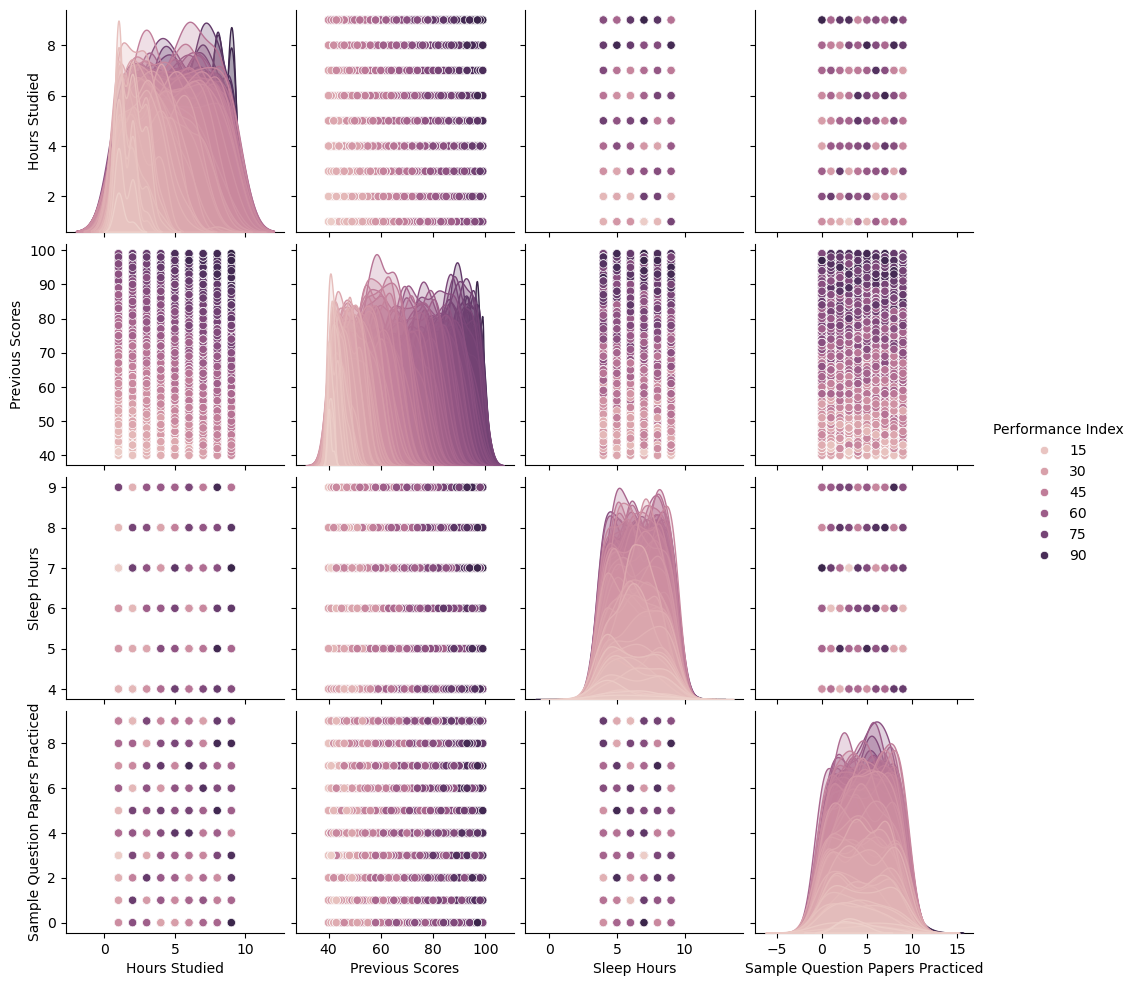

In [ ]:
sns.pairplot(df,hue="Performance Index") #plots pairwise realtionship in a dataset

In [11]:
#normalize the training data using sklearn

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train,y_train)

In [7]:
#create and fit the regression model

sgdr = SGDRegressor(max_iter =  1000)
sgdr.fit(X_norm,y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 8, number of weight updates: 80001.0


In [8]:
#extract model parameter after gradient decent

b_norm  = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [ 7.42927717 17.63653589  0.80952315  0.50492008], b:[55.20808268]


In [9]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)

print(f"Prediction on training set:\n{y_pred_sgd[:4]}" )
print(f"Target values \n{y_train[:4]}")

Prediction on training set:
[91.57072762 63.46344032 44.84700643 36.30115452]
Target values 
[91. 65. 45. 36.]


In [10]:
# Original new input (same feature order as training data)
x_new = np.array([6, 90, 9, 5])

# Normalize new input using training mean and std
x_new_norm = (x_new - x_new.mean()) / x_new.std()  # X_mean and X_std must come from training data

# Make prediction using w_norm and b_norm
y_new_pred = np.dot(x_new_norm, w_norm) + b_norm

print(f"Predicted Marks{y_new_pred }")


Predicted Marks[80.57793832]


<Axes: >

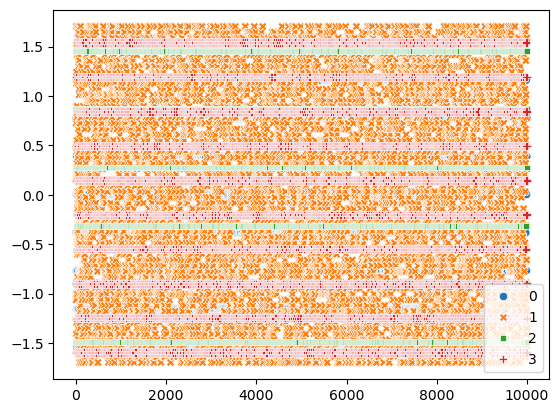

In [12]:

sns.scatterplot(X_norm)